In [295]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape

(214, 10)

In [5]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


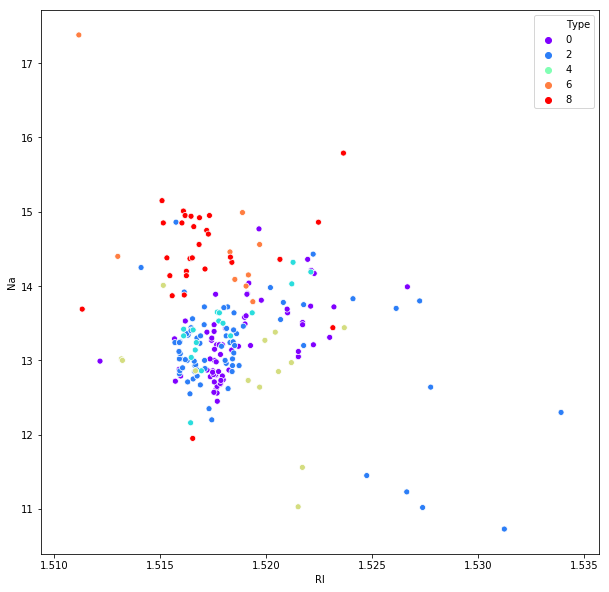

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='RI',y='Na', hue='Type',data=glass,palette='rainbow')
plt.show()

In [20]:
glass.Type=glass.Type.astype('category')

In [21]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null category
dtypes: category(1), float64(9)
memory usage: 15.5 KB


# Outlier Detection

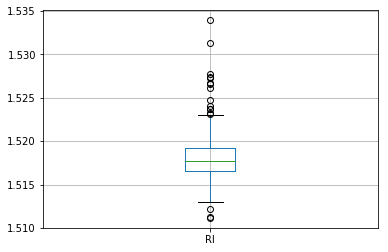

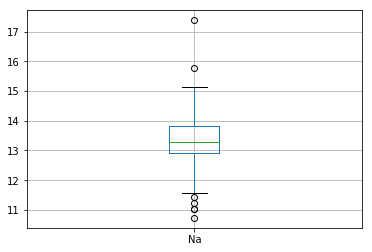

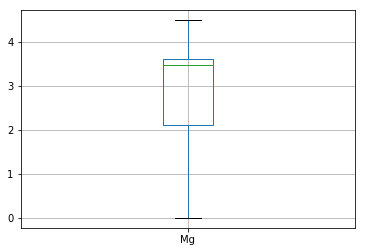

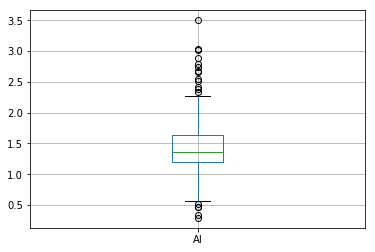

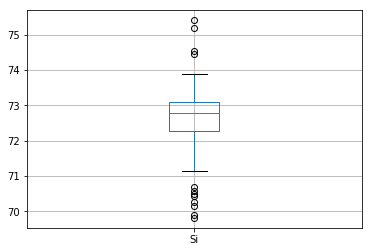

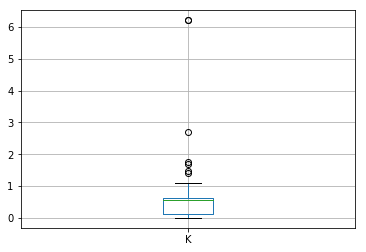

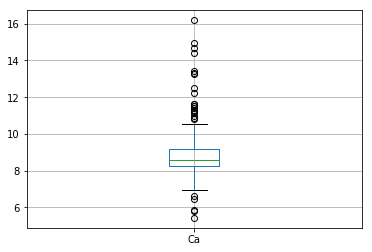

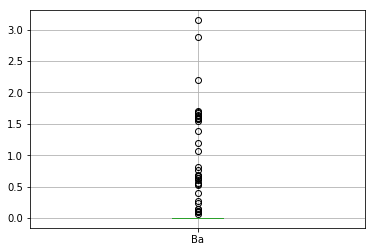

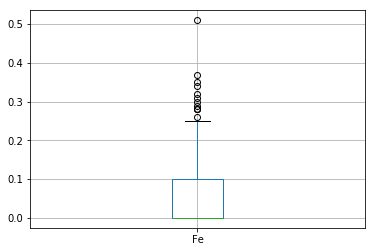

In [58]:
for column in glass.columns:
    if column != 'Type':
        plt.figure()
        glass.boxplot([column])

In [31]:
stdsc = StandardScaler()

In [34]:
glass_std = stdsc.fit_transform(glass.drop('Type', axis=1))

In [37]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [38]:
glass_std = pd.DataFrame(glass_std, columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])
glass_std.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
sns.boxplot

In [123]:
outlier = []

In [104]:
type(outlier)

list

In [124]:
outlier.append(list(glass_std[glass_std.Al > 3]['Al'].index.values))

In [42]:
glass_std[glass_std.Al < -3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [47]:
glass_std[glass_std.RI < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [125]:
outlier.append(list(glass_std[glass_std.RI > 3].index.values))

In [126]:
outlier.append(list(glass_std[glass_std.Na < -3].index.values))

In [127]:
outlier.append(list(glass_std[glass_std.Na > 3].index.values))

In [54]:
glass_std[glass_std.Mg < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [55]:
glass_std[glass_std.Mg > 3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [59]:
glass_std[glass_std.Ba < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [128]:
outlier.append(list(glass_std[glass_std.Ba > 3].index.values))

In [129]:
outlier.append(list(glass_std[glass_std.Si < -3].index.values))

In [130]:
outlier.append(list(glass_std[glass_std.Si > 3].index.values))

In [66]:
glass_std[glass_std.K < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [131]:
outlier.append(list(glass_std[glass_std.K > 3] .index.values))

In [69]:
glass_std[glass_std.Ca < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [132]:
outlier.append(list(glass_std[glass_std.Ca > 3].index.values))

In [72]:
glass_std[glass_std.Fe < -3] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe


In [142]:
(list(glass_std[glass_std.Fe > 3].index.values))

[145, 162, 174]

In [134]:
np.array(outlier)

array([list([163, 171, 172]), list([106, 107, 112]), list([106]),
       list([184]), list([106, 163, 189, 203, 207, 213]),
       list([106, 107, 163, 188]), list([184, 201]),
       list([171, 172, 201]), list([105, 106, 107, 110, 111, 112, 131]),
       list([145, 162, 174])], dtype=object)

In [210]:
out = list(np.ravel(list(outlier)))

In [211]:
out

[[163, 171, 172],
 [106, 107, 112],
 [106],
 [184],
 [106, 163, 189, 203, 207, 213],
 [106, 107, 163, 188],
 [184, 201],
 [171, 172, 201],
 [105, 106, 107, 110, 111, 112, 131],
 [145, 162, 174]]

In [148]:
outlist=[]
for i in out:
    for j in i:
        outlist.append(j)

In [156]:
outindex=list(set(outlist))
outindex

[131,
 145,
 162,
 163,
 171,
 172,
 174,
 184,
 188,
 189,
 201,
 203,
 207,
 213,
 105,
 106,
 107,
 110,
 111,
 112]

In [157]:
glass.drop(outindex,inplace=True)

In [158]:
glass.shape

(194, 10)

# Over-Sampling

In [241]:
from imblearn.over_sampling import SMOTE

In [242]:
x = glass.drop('Type', axis=1)
y = glass.Type

In [243]:
sm = SMOTE(k_neighbors=5,random_state=1)

In [244]:
x_os, y_os =sm.fit_sample(x,y)

In [245]:
x_os.shape

(420, 9)

# Splitting the data

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os,y_os,test_size=0.3,random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [316]:
from sklearn.linear_model import LogisticRegression

In [318]:
logreg = LogisticRegression()
logreg.fit(x_train_os,y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [319]:
logreg.score(x_test_os,y_test_os)

0.7380952380952381

# Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_os,y_train_os)
dt_model.score(x_test_os,y_test_os)

0.8888888888888888

In [171]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.6779661016949152

# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
rf_model = RandomForestClassifier(oob_score=True)
rf_model.fit(x_train_os,y_train_os)
rf_model.score(x_test_os,y_test_os)

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8968253968253969

In [194]:
rf_model.oob_score_

0.8435374149659864

# Bagging Classifier

In [180]:
from sklearn.ensemble import BaggingClassifier

In [185]:
bg_model = BaggingClassifier(oob_score=True)
bg_model.fit(x_train_os,y_train_os)
bg_model.score(x_test_os,y_test_os)

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.8968253968253969

In [191]:
bg_model.oob_score_

0.8401360544217688

# Gradient Boosting

In [195]:
from sklearn.ensemble import GradientBoostingClassifier

In [212]:
gb_model = GradientBoostingClassifier(max_depth=5)
gb_model.fit(x_train_os,y_train_os)
gb_model.score(x_test_os,y_test_os)

0.9444444444444444

In [213]:
gb_model.score(x_train_os,y_train_os)

1.0

# Random Search CV

In [204]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [205]:
param = {'max_depth': sp_randint(1,50)}

In [207]:
randomcv = RandomizedSearchCV(estimator=gb_model, param_distributions= param, cv=5,n_iter=100)

In [208]:
randomcv.fit(x_os,y_os)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA76E55D30>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [209]:
randomcv.best_params_

{'max_depth': 5}

In [300]:
randomcv = RandomizedSearchCV(estimator=rf_model, param_distributions= param, cv=5,n_iter=100)

In [301]:
randomcv.fit(x_os,y_os)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA76E55D30>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [302]:
randomcv.best_params_

{'max_depth': 37}

In [306]:
param = {'n_estimators': sp_randint(1,100)}

In [307]:
randomcv = RandomizedSearchCV(estimator=bg_model, param_distributions= param, cv=5,n_iter=100)

In [308]:
randomcv.fit(x_os,y_os)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=True, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA76073080>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [309]:
randomcv.best_params_

{'n_estimators': 9}

In [321]:
param = {'max_depth': sp_randint(1,50)}
randomcv = RandomizedSearchCV(estimator=dt_model, param_distributions= param, cv=5,n_iter=100)

In [322]:
randomcv.fit(x_os,y_os)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA760640F0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [323]:
randomcv.best_params_

{'max_depth': 38}

# Bootstrap Sampling

In [246]:
from sklearn.utils import resample

In [247]:
x_os = pd.DataFrame(x_os, columns=x.columns)
y_os = pd.DataFrame(y_os, columns=['Type'])

In [254]:
glassos=pd.concat([x_os,y_os],axis=1)

In [320]:
glassos.shape

(420, 10)

In [255]:
glassos.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [324]:
iterations = 100

values= glassos.values

booststats= []
rfstats = []
bgstats = []
dtstats = []
lrstats = []

for i in range(iterations):
    train = resample(values,n_samples=420)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    gb_model = GradientBoostingClassifier(max_depth=5)
    gb_model.fit(train[:,:-1] ,train[:,-1])
    gbscore = gb_model.score(test[:,:-1],test[:,-1])
    booststats.append(gbscore)
     
    rf_model = RandomForestClassifier(max_depth=37)
    rf_model.fit(train[:,:-1] ,train[:,-1])
    rfscore = rf_model.score(test[:,:-1],test[:,-1])
    rfstats.append(rfscore)
    
    bg_model = BaggingClassifier(n_estimators=9)
    bg_model.fit(train[:,:-1] ,train[:,-1])
    bgscore = bg_model.score(test[:,:-1],test[:,-1])
    bgstats.append(bgscore)
    
    dt_model = DecisionTreeClassifier(max_depth=38)
    dt_model.fit(train[:,:-1] ,train[:,-1])
    dtscore = dt_model.score(test[:,:-1],test[:,-1])
    dtstats.append(dtscore)
    
    logreg = LogisticRegression()
    logreg.fit(train[:,:-1] ,train[:,-1])
    lrscore = logreg.score(test[:,:-1],test[:,-1])
    lrstats.append(lrscore)


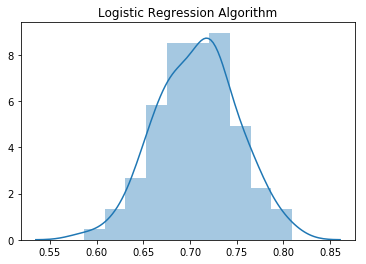

The  95 % confidence interval is:  62.4 % to  78.64999999999999 %


In [325]:
sns.distplot(lrstats)
plt.title('Logistic Regression Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(lrstats,lower),4)*100,
      '% to ',round(np.percentile(lrstats,upper),4)*100,'%')

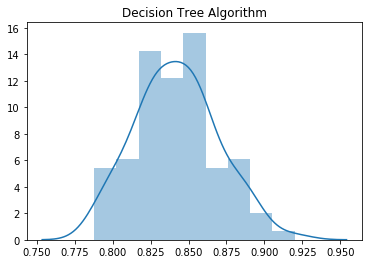

The  95 % confidence interval is:  79.4 % to  89.22 %


In [326]:
sns.distplot(dtstats)
plt.title('Decision Tree Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(dtstats,lower),4)*100,
      '% to ',round(np.percentile(dtstats,upper),4)*100,'%')

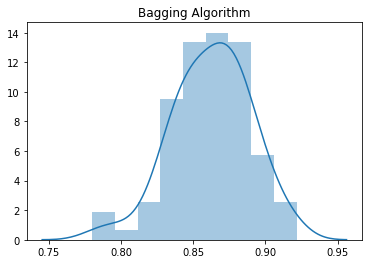

The  95 % confidence interval is:  80.2 % to  91.12 %


In [327]:
sns.distplot(bgstats)
plt.title('Bagging Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(bgstats,lower),4)*100,
      '% to ',round(np.percentile(bgstats,upper),4)*100,'%')

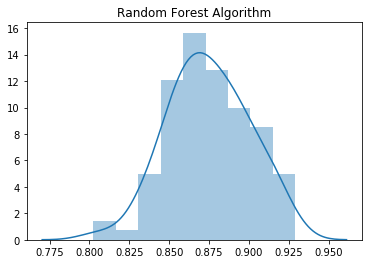

The  95 % confidence interval is:  83.06 % to  91.96 %


In [328]:
sns.distplot(rfstats)
plt.title('Random Forest Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(rfstats,lower),4)*100,
      '% to ',round(np.percentile(rfstats,upper),4)*100,'%')

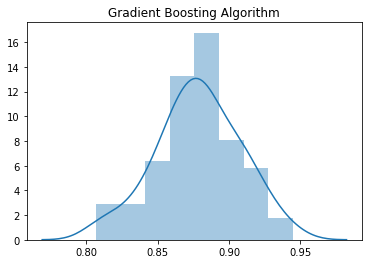

The  95 % confidence interval is:  81.39 % to  93.04 %


In [329]:
sns.distplot(booststats)
plt.title('Gradient Boosting Algorithm')
plt.show()

confidence = 95
lower = (100-confidence)/2
upper = confidence + lower

print('The ',confidence, '% confidence interval is: ',round(np.percentile(booststats,lower),4)*100,
      '% to ',round(np.percentile(booststats,upper),4)*100,'%')